In [425]:
import pandas as pd
import numpy as np
import pickle

In [426]:
path = "../Data/Barcelona/05Stage/Tables/Filtered/Score/Individual/3_0_filteredIndividualMetrics.pkl"
#path = "../Data/RVallecano/05Stage/Tables/Score/Global/globalMetrics.pkl"
#path = "../Data/Barcelona/05Stage/Tables/Filtered/Player/5503_filteredIndividualMetrics.pkl"
#path = "../Data/Barcelonaaa/04Stage/Metrics/Individual/IndividualnetworkMetrics.pkl"

In [427]:
def load_metrics(file):
    try:
        with open(file, "rb") as f:
            deserializedFile = pickle.load(f)
        return deserializedFile
    except FileNotFoundError:
        print(f"File  not found.")


In [428]:
def load_scores(scores):
    try:
        # Open the CSV file
        # Create a CSV reader object
        dfScore = pd.read_csv(scores)
        return dfScore
    except FileNotFoundError:
        print("The file does not exist.")
    except Exception as e:
        print("An error occurred:", e)

In [429]:
file = load_metrics(path)

In [430]:
#print(file.columns)

In [431]:
#headers = set(header[0] for header in file.columns)
#headers

In [432]:
file

inD                         outD                        clust        \
       Mean   Std Count      Class  Mean   Std Count      Class  Mean   Std   
5211   6.90  2.13    10  excellent  6.10  2.18    10  excellent  0.61  0.13   
4320   6.15  2.30    13  excellent  5.23  1.36    13       good  0.54  0.18   
5216   6.50  1.35    10  excellent  6.30  2.06    10  excellent  0.57  0.12   
4324   5.60  2.67    10       good  5.80  2.44    10  excellent  0.48  0.19   
5470   5.67  2.15    12       good  6.00  2.52    12  excellent  0.59  0.23   
5503   5.50  2.15    12       good  5.83  2.33    12  excellent  0.61  0.17   
7068   4.25  2.22     4        bad  4.25  1.26     4        bad  0.39  0.20   
4691   2.50  0.85    10      worst  4.30  2.26    10        bad  0.65  0.23   
5506   5.00  1.15    10     medium  6.30  2.11    10  excellent  0.53  0.19   
5203   5.67  2.35    12       good  6.33  2.39    12  excellent  0.53  0.18   
5246   5.83  2.21    12       good  3.83  1.99    12      worst  0.64  0.24   
5213   5.18  2.82    11       good  5.73  2.45    11  excellent  0.57  0.21   
10609  4.14  1.57     7        bad  4.14  1.07     7        bad  0.52  0.22   
11094  5.00  3.24     5     medium  5.20  3.11     5       good  0.77  0.06   
6616   5.25  2.87     4       good  3.25  1.50     4      worst  0.50  0.29   
6379   6.17  1.94     6  excellent  6.17  1.72     6  excellent  0.60  0.10   

       ...  clos            eigenv                         ecce              \
       ... Count      Class   Mean   Std Count      Class  Mean   Std Count   
5211   ...    10  excellent   0.33  0.06    10  excellent  2.10  0.32    10   
4320   ...    13       good   0.33  0.05    12  excellent  2.50  0.52    12   
5216   ...    10  excellent   0.35  0.06     9  excellent  2.33  0.50     9   
4324   ...    10       good   0.31  0.07     9  excellent  2.33  0.50     9   
5470   ...    12       good   0.30  0.05    11       good  2.36  0.67    11   
5503   ...    12       good   0.32  0.03    11  excellent  2.55  0.69    11   
7068   ...     4        bad   0.26  0.13     4       good  2.50  0.58     4   
4691   ...    10      worst   0.11  0.05     9      worst  2.33  0.50     9   
5506   ...    10     medium   0.28  0.08     9       good  2.22  0.67     9   
5203   ...    12       good   0.29  0.08    11       good  2.36  0.67    11   
5246   ...    12       good   0.31  0.08    11  excellent  2.82  0.60    11   
5213   ...    11     medium   0.23  0.09    10     medium  2.10  0.32    10   
10609  ...     7        bad   0.23  0.09     6     medium  2.50  0.55     6   
11094  ...     5       good   0.23  0.11     5     medium  2.40  0.55     5   
6616   ...     4     medium   0.29  0.07     4       good  2.75  0.96     4   
6379   ...     6  excellent   0.33  0.03     6  excellent  2.50  0.55     6   

                  
           Class  
5211       worst  
4320      medium  
5216         bad  
4324         bad  
5470         bad  
5503        good  
7068      medium  
4691         bad  
5506       worst  
5203         bad  
5246   excellent  
5213       worst  
10609     medium  
11094     medium  
6616   excellent  
6379      medium  

[16 rows x 28 columns]

In [433]:
headers = set(header[0] for header in file.columns)
    
for header in headers:
    classifyValues = pd.cut(np.array(file[(f"{header}", "Mean")]), 5, labels=["worst", "bad", "medium", "good", "excellent"]).astype(str)
    columnClassifiy = pd.DataFrame({'Class': classifyValues}, index=file[(f"{header}", "Mean")].index)
    print(columnClassifiy)

           Class
5211      medium
4320         bad
5216      medium
4324         bad
5470      medium
5503      medium
7068       worst
4691        good
5506         bad
5203         bad
5246        good
5213      medium
10609        bad
11094  excellent
6616         bad
6379      medium
           Class
5211   excellent
4320   excellent
5216   excellent
4324   excellent
5470        good
5503   excellent
7068        good
4691       worst
5506        good
5203        good
5246   excellent
5213      medium
10609     medium
11094     medium
6616        good
6379   excellent
           Class
5211   excellent
4320        good
5216   excellent
4324   excellent
5470   excellent
5503   excellent
7068         bad
4691         bad
5506   excellent
5203   excellent
5246       worst
5213   excellent
10609        bad
11094       good
6616       worst
6379   excellent
           Class
5211      medium
4320   excellent
5216        good
4324   excellent
5470   excellent
5503         bad
7068      medi

In [434]:
max_value = file[('inD', 'Count')].max()
print(max_value)
# Step 2: Calculate the threshold (1/4 of the maximum value)
threshold = max_value / 4
print(threshold)
# Step 3: Filter the DataFrame
filtered_df = file[file[('inD', 'Count')] >= threshold]

print("\nFiltered DataFrame:\n", filtered_df)

13
3.25

Filtered DataFrame:
         inD                         outD                        clust        \
       Mean   Std Count      Class  Mean   Std Count      Class  Mean   Std   
5211   6.90  2.13    10  excellent  6.10  2.18    10  excellent  0.61  0.13   
4320   6.15  2.30    13  excellent  5.23  1.36    13       good  0.54  0.18   
5216   6.50  1.35    10  excellent  6.30  2.06    10  excellent  0.57  0.12   
4324   5.60  2.67    10       good  5.80  2.44    10  excellent  0.48  0.19   
5470   5.67  2.15    12       good  6.00  2.52    12  excellent  0.59  0.23   
5503   5.50  2.15    12       good  5.83  2.33    12  excellent  0.61  0.17   
7068   4.25  2.22     4        bad  4.25  1.26     4        bad  0.39  0.20   
4691   2.50  0.85    10      worst  4.30  2.26    10        bad  0.65  0.23   
5506   5.00  1.15    10     medium  6.30  2.11    10  excellent  0.53  0.19   
5203   5.67  2.35    12       good  6.33  2.39    12  excellent  0.53  0.18   
5246   5.83  2.21    1

In [435]:
a = pd.cut(np.array(file[("inD", "Mean")]), 5,
       labels=["worst", "bad", "medium", "good", "excellent"])

b = pd.cut(np.array(file[("outD", "Mean")]), 5, labels=["worst", "bad", "medium", "good", "excellent"])

In [436]:
print(a)
print("")
print(b)

['excellent', 'excellent', 'excellent', 'good', 'good', ..., 'good', 'bad', 'medium', 'good', 'excellent']
Length: 16
Categories (5, object): ['worst' < 'bad' < 'medium' < 'good' < 'excellent']

['excellent', 'good', 'excellent', 'excellent', 'excellent', ..., 'excellent', 'bad', 'good', 'worst', 'excellent']
Length: 16
Categories (5, object): ['worst' < 'bad' < 'medium' < 'good' < 'excellent']


GRÀFICS

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt

In [438]:
categories = ['excellent', 'good', 'medium', 'bad', 'worst']
cat_type = pd.CategoricalDtype(categories=categories, ordered=True)
file[('inD', 'Class')] = file[('inD', 'Class')].astype(cat_type)

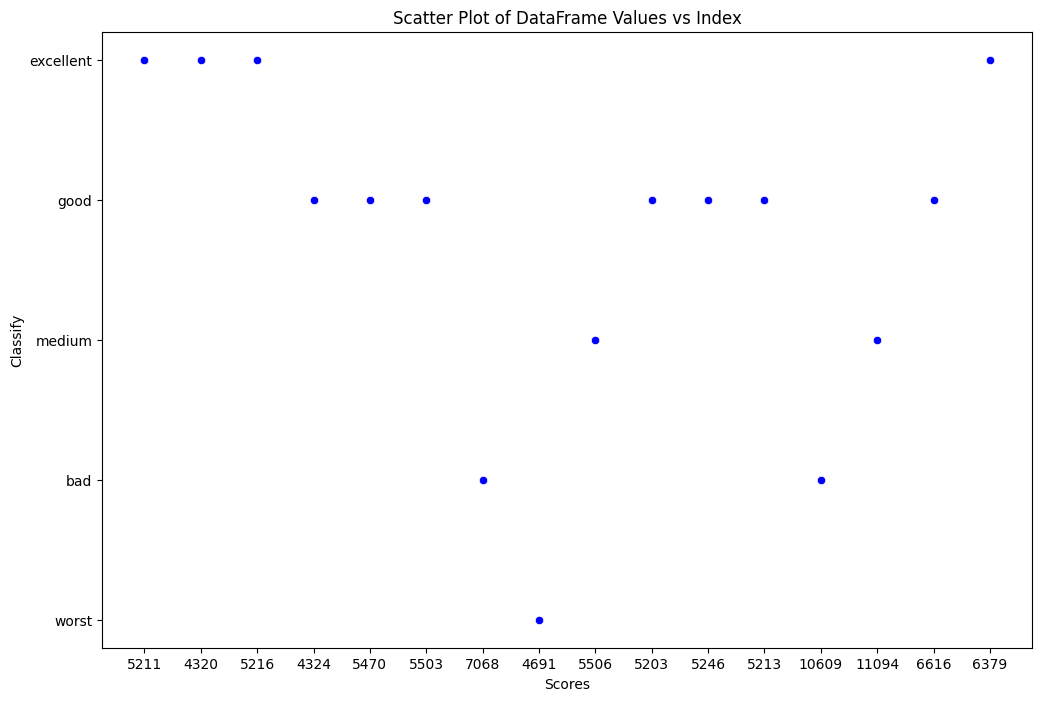

In [439]:
plt.figure(figsize=(12,8 ))
sns.scatterplot(x=file.index, y=file[("inD","Class")], color='blue')

# Adding titles and labels
plt.title('Scatter Plot of DataFrame Values vs Index')
plt.xlabel('Scores')
plt.ylabel('Classify')

# Displaying the plot
plt.grid(False)
plt.show()